In [1]:
# %pip install lime shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 13.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap

In [3]:
import pickle as pkl
with open('/home/jampanasasank/Documents/Deployment/Deployment/telecom_churn_prediction/model/model.pkl', 'rb') as f:
    model = pkl.load(f)

/home/jampanasasank/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:49:45] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [4]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
import pandas as pd

data = pd.read_csv("/home/jampanasasank/Documents/Deployment/Deployment/telecom_churn_prediction/archive (7)/WA_Fn-UseC_-Telco-Customer-Churn.csv")
sample_data = data.sample(100)

In [6]:
sample_data.drop(['Churn'], axis=1, inplace=True)

In [7]:
sample_data #raw data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
586,4568-KNYWR,Male,0,No,No,52,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),63.25,3342.45
6861,6692-UDPJC,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,91.65,1301
5659,0674-GCDXG,Male,0,No,No,63,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),71.90,4479.2
708,3014-WJKSM,Male,0,Yes,No,29,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,2263.4
2012,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,3420-ZDBMA,Male,1,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.45,371.6
6747,5245-VDBUR,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95
6639,4816-OKWNX,Male,0,Yes,Yes,50,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.40,5236.4
1825,5423-BHIXO,Female,0,No,No,32,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,54.20,1739.6


In [8]:
from inference.preprocess import Preprocess

obj = Preprocess("/home/jampanasasank/Documents/Deployment/Deployment/telecom_churn_prediction/model")

Loaded the estimators...


/home/jampanasasank/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jampanasasank/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
processed_data = obj.preprocess(sample_data)

Preprocessing done


In [10]:
processed_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
586,1,0,0,0,0.718310,2,0,0,3,3,0,0,3,0,3,2,1,0.448223,0.392088
6861,0,0,2,2,0.183099,2,3,1,0,0,0,3,3,0,0,2,2,0.740855,0.149431
5659,1,0,0,0,0.873239,2,3,0,3,0,3,3,0,3,3,2,0,0.537352,0.527208
708,1,0,2,0,0.394366,2,0,1,0,0,3,0,0,0,0,2,1,0.572385,0.263827
2012,0,0,2,0,0.647887,2,3,1,3,3,3,0,3,0,0,2,2,0.814013,0.533686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,1,1,0,0,0.056338,2,0,1,0,0,0,0,0,0,0,2,3,0.532715,0.038958
6747,0,0,2,0,0.718310,0,1,0,3,0,3,0,0,0,1,0,3,0.161772,0.227639
6639,1,0,2,2,0.690141,2,0,1,0,3,3,3,3,3,1,2,0,0.861927,0.617213
1825,0,0,0,0,0.436620,2,3,0,0,3,0,0,0,0,0,2,2,0.354972,0.201565


In [11]:
train = pd.read_csv("/home/jampanasasank/Documents/Deployment/Deployment/telecom_churn_prediction/preprocessed_data/preprocessed_train.csv")
train.drop(['Churn'], axis=1, inplace=True)

In [12]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,2,0.291667,2,0,0,3,0,3,0,0,3,1,0,3,0.464375,0.152089
1,0,0,0,0,0.750000,2,3,1,0,3,0,0,3,3,3,2,0,0.786746,0.589736
2,1,0,2,0,0.013889,0,1,0,0,0,0,0,0,0,0,2,2,0.051819,0.000537
3,1,0,0,0,0.055556,2,0,1,0,0,0,0,0,0,0,2,2,0.517688,0.025288
4,1,0,0,2,0.000000,2,3,0,3,3,0,3,0,0,3,2,0,0.434978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0,2,0,0.013889,2,0,1,3,0,0,0,3,3,0,2,2,0.764823,0.008793
5630,0,0,2,2,0.319444,2,3,0,3,3,3,3,3,3,3,2,1,0.725959,0.251500
5631,1,0,2,2,0.166667,2,0,2,1,1,1,1,1,1,0,2,2,0.028899,0.033147
5632,1,1,0,0,0.166667,2,3,1,0,0,3,0,3,3,0,2,2,0.809168,0.136320


In [13]:
test = pd.read_csv("/home/jampanasasank/Documents/Deployment/Deployment/telecom_churn_prediction/preprocessed_data/preprocessed_test.csv")
test.drop(['Churn'], axis=1, inplace=True)

In [14]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, train)

# Calculate SHAP values for test data
shap_values = explainer(test)

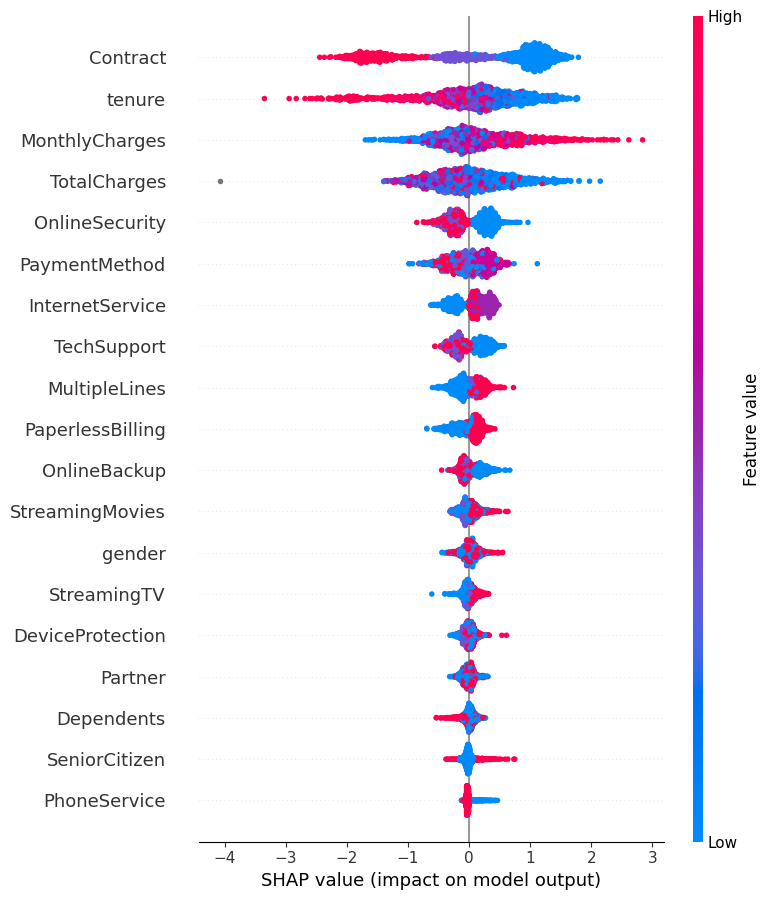

In [15]:
# Summary plot (global explanation)
shap.summary_plot(shap_values, test)

In [19]:
shap.initjs()

In [27]:
# Force plot (local explanation for a single prediction)
shap.force_plot(explainer.expected_value, shap_values[0].values, test.iloc[0], show=True, figsize=(20, 6))